In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy import stats
from scipy import *

# Цена опциона

# Цена опицона
## call

In [29]:
strike_price = 100
range_value = 10
r = 0.001
sigma = 0.03
T = 4
D = 0

In [30]:
# Расчет pay-off для call
def payoff_call(x):
    return max(x - strike_price, 0)

# Расчет pay-off для put
def payoff_put(x):
    return max(strike_price - x, 0)

# Расчет цены для call опциона
def fair_value_call(s,T):
    return stats.norm.cdf(d1(s, T))*s - stats.norm.cdf(d2(s, T)) * strike_price * math.e**(-r * T)

# Расчет цены для put опциона
def fair_value_put(s,T):
    return stats.norm.cdf(-d2(s, T))*strike_price * math.e**(-r * T) - stats.norm.cdf(-d1(s, T))*s


def d1(s, dt):
    return (math.log(s/strike_price) + (r + sigma**2/2) * dt)/(sigma * math.sqrt(dt))


def d2(s,dt):
    return d1(s, dt) - sigma * math.sqrt(dt)

In [31]:
# Выдает call и put для payoff 
def get_payoff():
    call, put = [], []
    for i in range(strike_price - range_value, strike_price + range_value, 1):
        call.append(payoff_call(i))
        put.append(payoff_put(i))
    return call, put
    
# Выдает call и put для fair value
def get_fair_value():
    call, put = [], []
    for i in range(strike_price - range_value, strike_price + range_value, 1):
        call.append(fair_value_call(i,T))
        put.append(fair_value_put(i,T))
    return call, put

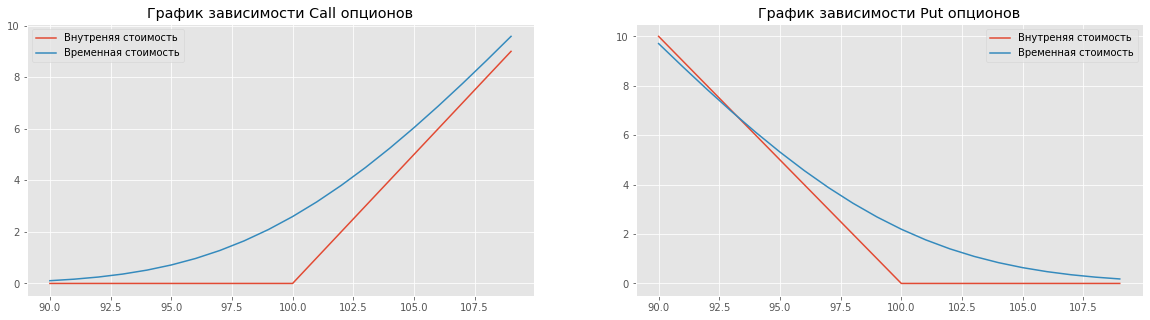

In [27]:
payoff_call_arr , payoff_put_arr = get_payoff() 
fair_value_call_arr , fair_value_put_arr = get_fair_value()

def draw_2_graphics():

    plt.figure(figsize=(20, 5))
    plt.style.use('ggplot')

    plt.subplot(1, 2, 1)
    plt.title('График зависимости Call опционов')
    plt.plot(np.arange(strike_price - range_value, strike_price + range_value, 1), payoff_call_arr, label='Внутреняя стоимость')
    plt.plot(np.arange(strike_price - range_value, strike_price + range_value, 1), fair_value_call_arr,label ='Временная стоимость')
    plt.legend(loc='best')
    
    plt.subplot(1, 2, 2)
    plt.title('График зависимости Put опционов')
    plt.plot(np.arange(strike_price - range_value, strike_price + range_value, 1), payoff_put_arr,label='Внутреняя стоимость')
    plt.plot(np.arange(strike_price - range_value, strike_price + range_value, 1), fair_value_put_arr, label='Временная стоимость')
    plt.legend(loc='best')
draw_2_graphics()